In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from  tensorflow.keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [3]:
from  tensorflow.keras.models import Sequential
from  tensorflow.keras.layers import Dense, Conv2D, Flatten

model = Sequential()

model.add(Conv2D(10, kernel_size=(3, 3), activation="sigmoid", input_shape=(28, 28, 1)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train.reshape(60000, 28, 28, 1), y_train, epochs=10, batch_size=1000)

Epoch 1/10
60/60 [==============================] - 3s 41ms/step - loss: 3.6799 - accuracy: 0.4110
Epoch 2/10
60/60 [==============================] - 2s 41ms/step - loss: 0.8512 - accuracy: 0.7183
Epoch 3/10
60/60 [==============================] - 3s 43ms/step - loss: 0.6171 - accuracy: 0.7854
Epoch 4/10
60/60 [==============================] - 3s 50ms/step - loss: 0.5387 - accuracy: 0.8133
Epoch 5/10
60/60 [==============================] - 3s 48ms/step - loss: 0.4887 - accuracy: 0.8280
Epoch 6/10
60/60 [==============================] - 3s 53ms/step - loss: 0.4252 - accuracy: 0.8492
Epoch 7/10
60/60 [==============================] - 3s 50ms/step - loss: 0.3952 - accuracy: 0.8579
Epoch 8/10
60/60 [==============================] - 3s 45ms/step - loss: 0.3685 - accuracy: 0.8678
Epoch 9/10
60/60 [==============================] - 3s 50ms/step - loss: 0.3575 - accuracy: 0.8712
Epoch 10/10
60/60 [==============================] - 3s 47ms/step - loss: 0.3221 - accuracy: 0.8861


In [12]:
model.layers[0].weights[0]

<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 10) dtype=float32, numpy=
array([[[[-0.22464234, -0.29947788,  0.02368485,  0.15186165,
           0.03218066,  0.15700102,  0.0375466 ,  0.14515738,
          -0.19148675,  0.21803357]],

        [[ 0.21952254, -0.20322494, -0.18503948, -0.24839935,
          -0.04337317,  0.07383545,  0.17041396,  0.02654413,
           0.09020488, -0.11046324]],

        [[ 0.02137829, -0.03508775,  0.1413609 , -0.12539308,
           0.12949362, -0.25400943, -0.3142536 , -0.02948268,
           0.05137533,  0.08180097]]],


       [[[-0.25359723, -0.07177307, -0.22130992, -0.10845511,
          -0.19914028, -0.13040926, -0.11223446,  0.07386953,
           0.01128729, -0.23089226]],

        [[ 0.20418814,  0.02771723, -0.22822277, -0.05690966,
          -0.17443842,  0.04831221, -0.2463876 ,  0.0840112 ,
          -0.02102936, -0.16640037]],

        [[ 0.19618152,  0.16022496, -0.03925523,  0.04678425,
           0.13071457,  0.1071628 ,  0.0426593

In [13]:
import  tensorflow.keras.backend as K

data = K.eval(model.layers[0].weights[0])
print(data)

[[[[-0.22464234 -0.29947788  0.02368485  0.15186165  0.03218066
     0.15700102  0.0375466   0.14515738 -0.19148675  0.21803357]]

  [[ 0.21952254 -0.20322494 -0.18503948 -0.24839935 -0.04337317
     0.07383545  0.17041396  0.02654413  0.09020488 -0.11046324]]

  [[ 0.02137829 -0.03508775  0.1413609  -0.12539308  0.12949362
    -0.25400943 -0.3142536  -0.02948268  0.05137533  0.08180097]]]


 [[[-0.25359723 -0.07177307 -0.22130992 -0.10845511 -0.19914028
    -0.13040926 -0.11223446  0.07386953  0.01128729 -0.23089226]]

  [[ 0.20418814  0.02771723 -0.22822277 -0.05690966 -0.17443842
     0.04831221 -0.2463876   0.0840112  -0.02102936 -0.16640037]]

  [[ 0.19618152  0.16022496 -0.03925523  0.04678425  0.13071457
     0.1071628   0.04265934  0.08296959 -0.24968779 -0.10791748]]]


 [[[ 0.04555656 -0.1446593  -0.0215027   0.15305448  0.14868657
    -0.0612766   0.14121243 -0.23204088  0.20321198  0.03120831]]

  [[-0.06916347 -0.01440534  0.12773219 -0.15277435  0.10253183
     0.10934599

In [14]:
data[:, :, :, 0].reshape(3, 3)

array([[-0.22464234,  0.21952254,  0.02137829],
       [-0.25359723,  0.20418814,  0.19618152],
       [ 0.04555656, -0.06916347, -0.1539417 ]], dtype=float32)

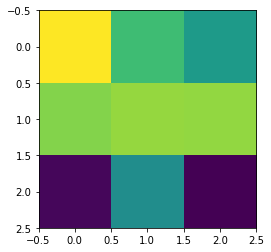

In [15]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data[:, :, :, 7].reshape(3, 3))
plt.show()

### Vergleich: https://en.wikipedia.org/wiki/Sobel_operator

$ {\displaystyle \mathbf {G} _{x}={\begin{bmatrix}+1&0&-1\\+2&0&-2\\+1&0&-1\end{bmatrix}}*\mathbf {A} \quad {\mbox{and}}\quad \mathbf {G} _{y}={\begin{bmatrix}+1&+2&+1\\0&0&0\\-1&-2&-1\end{bmatrix}}*\mathbf {A} } $ 